# Calculating the $\beta$ of a security using linear regression

In this code, we calculate the $\beta$ of a security. The price data is downloaded from Yahoo finance and the monthly returns are calculated. We choose the Microsoft stock and calculate its correlation with the S&P 500. 

The Beta of an asset is a measure of the sensitivity of its returns relative to a market benchmark (usually a market index). 

The formula is: $\beta = \frac{cov(r_s r_b)}{var(r_b)}$

$r_s$: return of the stock

$r_b$: return of the benchmark

In [9]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [16]:
price_data = pd.DataFrame()
asset_list = ['MSFT','^GSPC']

for asset in asset_list:
    price_data[asset] = wb.get_data_yahoo(asset, start='2016-01-01', end='2019-01-01', interval='m')['Adj Close']
    

We calculate the log-returns and remove the NaN value in the top row.  

In [17]:
return_data = np.log(1.0 + price_data.pct_change())
return_data = return_data.dropna(axis=0)

In [18]:
return_data.head()

,MSFT,^GSPC
Date,,
2016-02-01,-0.079498,-0.004137
2016-03-01,0.089191,0.063905
2016-04-01,-0.102087,0.002696
2016-05-01,0.060872,0.015208
2016-06-01,-0.028168,0.000911


Calculating the beta using linear regression.

In [19]:
X = return_data['^GSPC']
y = return_data['MSFT']

X1 = sm.add_constant(X)

model = sm.OLS(y, X1)

### fit model and print results

In [20]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     24.61
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           1.93e-05
Time:                        14:35:27   Log-Likelihood:                 66.853
No. Observations:                  36   AIC:                            -129.7
Df Residuals:                      34   BIC:                            -126.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0104      0.007      1.538      0.1

The $\beta$ value calculated here is 1.0019. The value quoted in Yahoo finance is 1.02 which is close to our calculation.

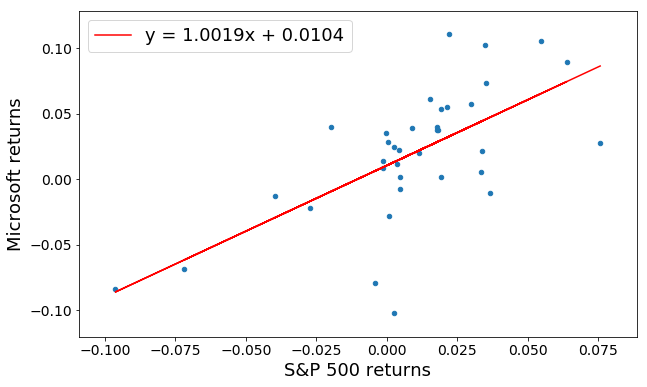

In [28]:
return_data.plot(x='^GSPC', y='MSFT', kind='scatter', figsize=(10, 6));
plt.plot(X, 1.0019*X + 0.0104, color = 'r', label = 'y = 1.0019x + 0.0104')
plt.xlabel('S&P 500 returns', size = 18)
plt.ylabel('Microsoft returns', size = 18)
plt.tick_params(labelsize=14)
plt.legend(fontsize = 18)
